K= 1
Akurasi= 71.33596113385812
---------------------------
K= 3
Akurasi= 73.05463988871581
---------------------------
K= 5
Akurasi= 72.64817022222118
---------------------------
K= 7
Akurasi= 74.21270371047594
---------------------------
K= 9
Akurasi= 73.36675870912191
---------------------------
K= 11
Akurasi= 74.58461695139648
---------------------------
K= 13
Akurasi= 75.45412420407965
---------------------------
K= 15
Akurasi= 75.76791876809699
---------------------------
K= 17
Akurasi= 75.28550828960738
---------------------------
K= 19
Akurasi= 75.52503778524095
---------------------------
K= 21
Akurasi= 75.65574578691671
---------------------------
K= 23
Akurasi= 75.56294569803748
---------------------------
K= 25
Akurasi= 75.54692429295888
---------------------------
K= 27
Akurasi= 75.69365369971321
---------------------------
K= 29
Akurasi= 77.04221994366354
---------------------------
K= 31
Akurasi= 75.89611315435589
---------------------------
K= 33
Akurasi= 75.41454054767

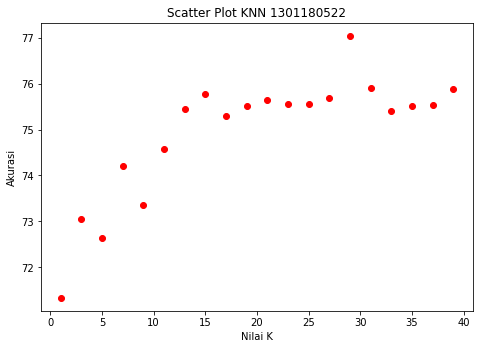

K terbaik:  29
Rerata akurasi dari K terbaik:  77.04221994366354


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def read(namanya):
  df = pd.read_csv(namanya)
  return df

def normalization(df):
  df = df.rename(columns={'Pregnancies':'PRG',
                          'Glucose':'GLC',
                          'BloodPressure':'BPS',
                          'SkinThickness' : 'STH',
                          'Insulin' : 'INS',
                          'DiabetesPedigreeFunction' : 'DPF',
                          'Age' : 'AGE'
                          })
  df['PRG'] = (df['PRG']-df['PRG'].mean())/(df['PRG'].std())
  df['GLC'] = (df['GLC']-df['GLC'].mean())/(df['GLC'].std())
  df['BPS'] = (df['BPS']-df['BPS'].mean())/(df['BPS'].std())
  df['STH'] = (df['STH']-df['STH'].mean())/(df['STH'].std())
  df['INS'] = (df['INS']-df['INS'].mean())/(df['INS'].std())
  df['BMI'] = (df['BMI']-df['BMI'].mean())/(df['BMI'].std())
  df['DPF'] = (df['DPF']-df['DPF'].mean())/(df['DPF'].std())
  df['AGE'] = (df['AGE']-df['AGE'].mean())/(df['AGE'].std())
  return df

def dataset(dataset,x):
  if (x == 1):
    dataset_train = dataset.iloc[:614]
    dataset_test = dataset.iloc[614:]
  elif (x == 2):
    dataset_train_1 = dataset.iloc[:461]
    dataset_train_2 = dataset.iloc[642:765]
    dataset_train = pd.concat([dataset_train_1, dataset_train_2])
    dataset_test = dataset.iloc[461:642]
  elif (x == 3):
    dataset_train_1 = dataset.iloc[:307]
    dataset_train_2 = dataset.iloc[462:765]
    dataset_train = pd.concat([dataset_train_1, dataset_train_2])
    dataset_test = dataset.iloc[307:462]
  elif (x == 4):
    dataset_train_1 = dataset.iloc[:154]
    dataset_train_2 = dataset.iloc[308:765]
    dataset_train = pd.concat([dataset_train_1, dataset_train_2])
    dataset_test = dataset.iloc[154:308]
  elif (x == 5):
    dataset_train = dataset.iloc[155:765]
    dataset_test = dataset.iloc[:155]
  return dataset_train, dataset_test

def knn(train, test, K_val):
  accurate = 0
  for i in range(len(test)):
    # dataframe untuk simpan value baru
    train_val = train.copy()
    
    # rumus 
    train_val['DST'] = np.sqrt(pow(test.iloc[i,0] - train_val['PRG'],2) + pow(test.iloc[i,1] - train_val['GLC'],2) + pow(test.iloc[i,2] - train_val['BPS'],2)
    + pow(test.iloc[i,3] - train_val['STH'],2) + pow(test.iloc[i,4] - train_val['INS'],2) + pow(test.iloc[i,5] - train_val['BMI'],2)
    + pow(test.iloc[i,6] - train_val['DPF'],2) + pow(test.iloc[i,7] - train_val['AGE'],2))

    # sorting ascending
    sort_value = train_val.sort_values(by='DST')
    # right wrong outcome
    r = 0; w = 0; o = 0

    for j in range(K_val):
      if (sort_value.iloc[j,8] == 1):
        r+=1
      else:
        w+=1
    
    if (w < r):
      o = 1
    else:
      o = 0
    
    if (o == test.iloc[i,8]):
      accurate+=1
    else:
      accurate+=0
  return accurate, len(test)-accurate, accurate/len(test), len(test)-accurate/len(test)
          # 0 benar       1 salah      2 akurasi benar           3 akurasi salah
def mainprogram(namanya,k):
  ave = 0
  df = normalization(read(namanya))

  df1 = dataset(df,1)
  df2 = dataset(df,2)
  df3 = dataset(df,3)
  df4 = dataset(df,4)
  df5 = dataset(df,5)

  knn1 = knn(df1[0],df1[1],k)
  knn2 = knn(df2[0],df2[1],k)
  knn3 = knn(df3[0],df3[1],k)
  knn4 = knn(df4[0],df4[1],k)
  knn5 = knn(df5[0],df5[1],k)

  ave = ((knn1[2] + knn2[2] + knn3[2] + knn4[2] + knn5[2])/5)*100

  return ave

def runprogram(y):
  k_val = 1
  list_k = list()
  list_k_val = list()
  max = 0
  k_best = 0
  for i in range(y):
    this = mainprogram("Diabetes.xls",k_val)
    if max<this:
      max = this
      k_best = k_val
    else:
      max = max
      k_best = k_best
    print('K=',k_val)
    print('Akurasi=',this)
    print('---------------------------')
    list_k.append(k_val)
    list_k_val.append(this)
    k_val+=2

  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])
  ax.scatter(list_k,list_k_val,color='red')
  ax.set_title('Scatter Plot KNN 1301180522')
  ax.set_xlabel('Nilai K')
  ax.set_ylabel('Akurasi')
  plt.show()
  print('K terbaik: ',k_best)
  print('Rerata akurasi dari K terbaik: ',max)

runprogram(20)